In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

## Data Pre-processing and Data Augmentation

Tutorial from https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [59]:
from keras.preprocessing.image import ImageDataGenerator

# to avoid problems with truncated images during model.fit
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

#train_datagen = ImageDataGenerator(rescale = 1./255)
# this is the augmentation configuration we will use for testing:
# only rescaling
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'C:/Users/Kris/Desktop/Data_Science_Bootcamp/Final_project/data/train',
        #'C:/Users/Kris/Downloads/archive/output/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = val_datagen.flow_from_directory(
        'C:/Users/Kris/Desktop/Data_Science_Bootcamp/Final_project/data/val',
        #'C:/Users/Kris/Downloads/archive/output/val',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        'C:/Users/Kris/Desktop/Data_Science_Bootcamp/Final_project/data/test',
        #'C:/Users/Kris/Downloads/archive/output/test',
        target_size=(150, 150),
        batch_size=batch_size,
        shuffle = False,
        class_mode='categorical')

Found 1147 images belonging to 5 classes.
Found 151 images belonging to 5 classes.
Found 156 images belonging to 5 classes.


## Create and fit Model

In [39]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(128, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('sigmoid'))
#model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [4]:
# define callbacks for model fit method

my_calls = [tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=4, restore_best_weights=True),
           tf.keras.callbacks.ReduceLROnPlateau(monitor='accuracy', patience=4, factor=.01, min_lr=1e-5, verbose = 1),
           tf.keras.callbacks.ModelCheckpoint("my_model_{epoch}", monitor='accuracy', save_best_only=True, verbose=1)
           ]

In [43]:
model.fit(
        train_generator,
        steps_per_epoch=1000 // batch_size,
        epochs=20,
        callbacks = my_calls,
        validation_data=validation_generator,
        validation_steps=400 // batch_size)


Epoch 1/20
62/62 [==============================] - 28s 443ms/step - loss: 1.6126 - accuracy: 0.2543 - val_loss: 1.5000 - val_accuracy: 0.4503

Epoch 00001: accuracy did not improve from 0.80142
Epoch 2/20
62/62 [==============================] - 24s 378ms/step - loss: 1.4360 - accuracy: 0.3982

Epoch 00002: accuracy did not improve from 0.80142
Epoch 3/20
62/62 [==============================] - 25s 396ms/step - loss: 1.1382 - accuracy: 0.5664

Epoch 00003: accuracy did not improve from 0.80142
Epoch 4/20
62/62 [==============================] - 24s 393ms/step - loss: 1.0437 - accuracy: 0.5988

Epoch 00004: accuracy did not improve from 0.80142
Epoch 5/20
62/62 [==============================] - 24s 380ms/step - loss: 0.9642 - accuracy: 0.6201

Epoch 00005: accuracy did not improve from 0.80142
Epoch 6/20
62/62 [==============================] - 24s 392ms/step - loss: 0.8458 - accuracy: 0.6738

Epoch 00006: accuracy did not improve from 0.80142
Epoch 7/20
62/62 [======================

C:\Users\Kris\anaconda3\envs\tf\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


62/62 [==============================] - 25s 399ms/step - loss: 0.4690 - accuracy: 0.8166

Epoch 00015: accuracy improved from 0.81459 to 0.81662, saving model to my_model_15
INFO:tensorflow:Assets written to: my_model_15\assets
Epoch 16/20
11/62 [====>.........................] - ETA: 21s - loss: 0.5197 - accuracy: 0.7784

C:\Users\Kris\anaconda3\envs\tf\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


62/62 [==============================] - 25s 401ms/step - loss: 0.4766 - accuracy: 0.8166

Epoch 00016: accuracy did not improve from 0.81662
Epoch 17/20
62/62 [==============================] - 24s 388ms/step - loss: 0.4976 - accuracy: 0.8257

Epoch 00017: accuracy improved from 0.81662 to 0.82573, saving model to my_model_17
INFO:tensorflow:Assets written to: my_model_17\assets
Epoch 18/20
 8/62 [==>...........................] - ETA: 23s - loss: 0.4482 - accuracy: 0.8281

C:\Users\Kris\anaconda3\envs\tf\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


62/62 [==============================] - 24s 389ms/step - loss: 0.4541 - accuracy: 0.8328

Epoch 00018: accuracy improved from 0.82573 to 0.83283, saving model to my_model_18
INFO:tensorflow:Assets written to: my_model_18\assets
Epoch 19/20
11/62 [====>.........................] - ETA: 20s - loss: 0.4184 - accuracy: 0.8807

C:\Users\Kris\anaconda3\envs\tf\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


62/62 [==============================] - 25s 399ms/step - loss: 0.4076 - accuracy: 0.8480

Epoch 00019: accuracy improved from 0.83283 to 0.84802, saving model to my_model_19
INFO:tensorflow:Assets written to: my_model_19\assets
Epoch 20/20
30/62 [=============>................] - ETA: 12s - loss: 0.4093 - accuracy: 0.8147

C:\Users\Kris\anaconda3\envs\tf\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


62/62 [==============================] - 25s 398ms/step - loss: 0.4005 - accuracy: 0.8328

Epoch 00020: accuracy did not improve from 0.84802


In [44]:
model.evaluate(test_generator)

10/10 [==============================] - 3s 302ms/step - loss: 0.2854 - accuracy: 0.9103


[0.28536665439605713, 0.9102563858032227]

## Save model

In [45]:
model.save('models/data_aug_model')

INFO:tensorflow:Assets written to: models/data_aug_model\assets


In [46]:
# load the model to check if saving worked

new_model = tf.keras.models.load_model('models/data_aug_model')
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)       

## Predict Asana for a new image

In [47]:
# generate a list of class names from the class_indices from the image generator
class_map = train_generator.class_indices

classes = []
for key in class_map.keys():
    classes.append(key)

In [48]:
classes

['downdog', 'goddess', 'plank', 'tree', 'warrior2']

In [49]:
def load_image(filename):
        
    img = tf.keras.utils.load_img(filename, target_size=(150,150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    return img_array, img_processed

In [50]:
plot_image, image = load_image('C:/Users/Kris/Desktop/Data_Science_Bootcamp/Final_project/data/test/tree/00000006.jpg')

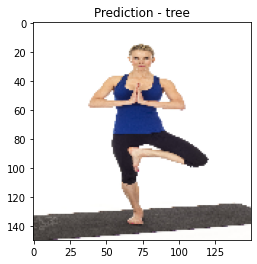

In [51]:
prediction = model.predict(image)
index = np.argmax(prediction)

plt.title(f'Prediction - {classes[index]}')
plt.imshow(plot_image)

## Plot a Confusion Matrix

In [80]:
def confusion_ma(y_true, y_pred, class_names):
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    cm = confusion_matrix(y_true, y_pred, normalize=None)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.savefig('confusion_matrix.jpg', transparent=True, dpi=300, bbox_inches='tight')
    plt.show()
    return plt.show()

In [55]:
class_map = train_generator.class_indices

classes = []
for key in class_map.keys():
    classes.append(key)

In [60]:
Y_pred = model.predict(test_generator, verbose = True)
y_pred = np.argmax(Y_pred, axis=1)

10/10 [==============================] - 3s 280ms/step


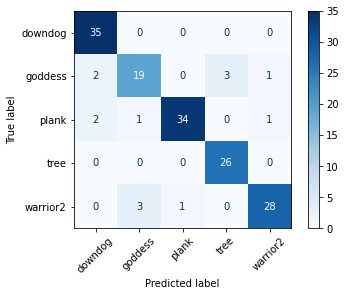

In [81]:
confusion_ma(test_generator.classes, y_pred, classes)

In [68]:
cm_plot = plt.savefig('confusion_matrix.png', transparent=True)

<Figure size 432x288 with 0 Axes>